In [1]:
import sys
import numpy as np
sys.path.append('/Users/IzmailovPavel/Documents/Education/Projects/Course Project/Code')
import numpy as np
import matplotlib as mpl

from matplotlib import pyplot as plt

from GP.covariance_functions import SquaredExponential
from GP.gaussian_process_regression import GPR

from sklearn.cluster import KMeans

from sklearn.datasets import load_svmlight_file
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [31]:
data_params = np.array([1.0, 0.3, 0.1])
data_covariance_obj = SquaredExponential(data_params)

In [32]:
gp = GPR(data_covariance_obj)
num = 300
test_num = 100
dim = 2
seed = 10

In [71]:
np.random.seed(seed)
#x_tr = np.random.rand(dim, num)
x_tr = np.random.normal(size=(dim, num))
if dim == 1:
    x_test = np.linspace(0, 1, test_num)
    x_test = x_test.reshape(1, test_num)
else:
    #x_test = np.random.rand(dim, test_num)
    x_test = np.random.normal(size=(dim, test_num))

x_tr /= 3
x_test /= 3
y_tr, y_test = gp.generate_data(x_tr, x_test, seed=seed)
x_tr = x_tr.T
x_test = x_test.T

In [75]:
d = x_tr.shape[1] # == 2
D = 3
P = np.random.rand(D, d)

In [76]:
from scipy.linalg import orth

In [77]:
P = orth(P)

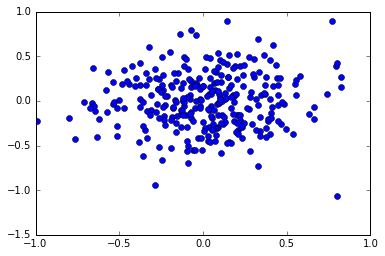

In [78]:
plt.plot(x_tr[:, 0], x_tr[:, 1], 'bo')

In [79]:
projected = x_tr.dot(P.T)
projected_test = x_test.dot(P.T)

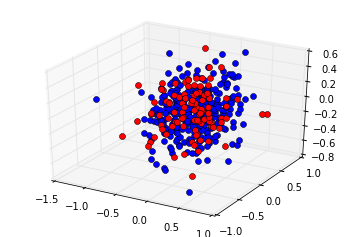

In [80]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(projected[:, 0], projected[:, 1], projected[:, 2], 'bo')
ax.plot(projected_test[:, 0], projected_test[:, 1], projected_test[:, 2], 'ro')

In [49]:
Q, S, V = np.linalg.svd(projected.T.dot(projected))

In [50]:
P_pca = Q[:, :2]#.dot(np.diag(S[:2]))

In [51]:
from scipy.linalg import sqrtm

In [52]:
P_pca

array([[ 0.16031774,  0.95195576],
       [-0.79438993,  0.28133098],
       [-0.58586932, -0.12096742]])

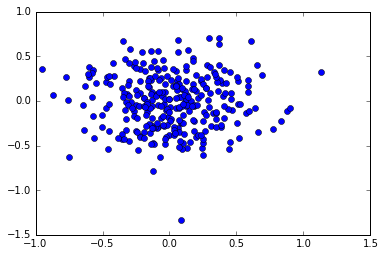

In [45]:
reprojected = projected.dot(P_pca)
plt.plot(reprojected[:, 0], reprojected[:, 1], 'bo')

In [81]:
np.save('../../data/simple_projection(300,3)/x_tr.npy', projected)
np.save('../../data/simple_projection(300,3)/x_te.npy', projected_test)
np.save('../../data/simple_projection(300,3)/y_tr.npy', y_tr)
np.save('../../data/simple_projection(300,3)/y_te.npy', y_test)

In [48]:
P_pca

array([[ 0.16031774,  0.95195576],
       [-0.79438993,  0.28133098],
       [-0.58586932, -0.12096742]])

In [21]:
P_learned = np.array([[0.284, -0.812, -0.872], [1.127, 0.316, -0.217]])

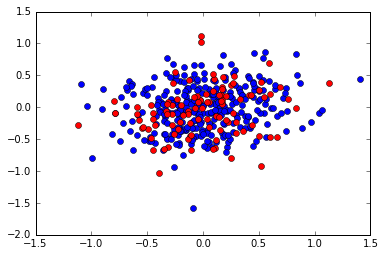

In [30]:
reprojected_test = projected_test.dot(P_learned.T)
reprojected_tr = projected.dot(P_learned.T)
plt.plot(reprojected_tr[:, 0], reprojected_tr[:, 1], 'bo')
plt.plot(reprojected_test[:, 0], reprojected_test[:, 1], 'ro')

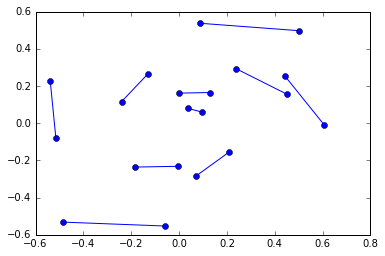

In [70]:
for i in range(10):
    plt.plot([reprojected_tr[i, 0], x_tr[i, 0]], 
             [reprojected_tr[i, 1], x_tr[i, 1]], '-bo')


In [72]:
np.save('../../data/temp/x_tr.npy', x_tr)
np.save('../../data/temp/x_te.npy', x_test)
np.save('../../data/temp/y_tr.npy', y_tr)
np.save('../../data/temp/y_te.npy', y_test)

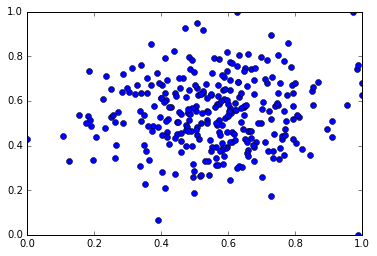

In [73]:
x_max = np.max(x_tr, axis=0)
x_min = np.min(x_tr, axis=0)
x_tr_normalized = (x_tr - x_min) / (x_max - x_min)
plt.plot(x_tr_normalized[:, 0], x_tr_normalized[:, 1], 'bo')

In [67]:
x_max

array([ 0.82255035,  0.89330344])

In [68]:
x_min

array([-0.99319892, -1.06813378])